## train with finetune data
Goal here was to test whether simply increasing learning rate was enough to abolish drops in accuracy that depend on number of distractors, or whether (alternativley) abolishing the effect in part depends on increasing the training data.

In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import searchnets

In [2]:
results_dir = Path('/../../data/results/')
data_prep_dir = Path('../../data/data_prepd_for_nets/')

In [4]:
searchnets.utils.general.results_csv(data_prep_dir,
                                     results_dir,
                                     test_csv_path='./alexnet_train_finetune_data.csv',
                                     nets=('alexnet',),
                                     train_types=('train_finetune_data',),
                                     stims=('2_v_5', 'RVvGV', 'RVvRHGV'),
                                     target_condition=('present', 'absent'),
                                     data_gz_paths=data_gz_paths,
                                     results_gz_paths=results_gz_paths)

In [6]:
atft_df = pd.read_csv('alexnet_train_finetune_data.csv')

In [7]:
atft_df.head()

,Unnamed: 0,net_name,train_type,net_number,stimulus,target_condition,set_size,accuracy
0,0,alexnet,train_finetune_data,0,2_v_5,present,1,0.99
1,1,alexnet,train_finetune_data,0,2_v_5,present,2,0.77
2,2,alexnet,train_finetune_data,0,2_v_5,present,4,0.49
3,3,alexnet,train_finetune_data,0,2_v_5,present,8,0.37
4,4,alexnet,train_finetune_data,0,2_v_5,absent,1,0.98


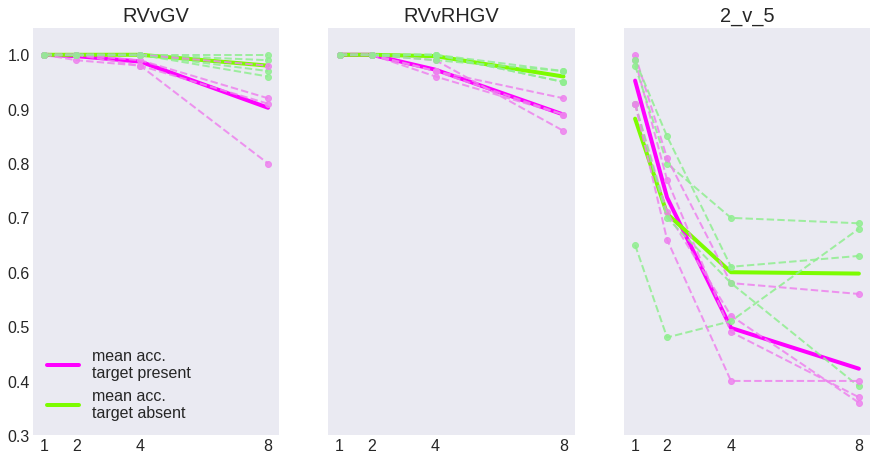

In [8]:
figsize=(15,7.5)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for col, (stim_name, stim_abbrev) in enumerate(zip(
    ['feature', 'conjunction', 'spatial configuration'],
    ['RVvGV', 'RVvRHGV', '2_v_5'])):
        if col==0:
            add_legend=True
        else:
            add_legend=False

        searchnets.plot.acc_v_set_size_df(df=atft_df, net_name='alexnet',
                                          train_type='train_finetune_data', stimulus=stim_abbrev, 
                                          ylim=(0.3, 1.05), ax=ax[col], add_legend=add_legend)
        ax[col].set_title(stim_abbrev)

Above result suggests that, no, simply increaseing the learning rate was not enough.